In [134]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [135]:
#Read excel file and convert into Dataframe
data=pd.read_excel(r'D:\DataTrained\Flip Robo Technology Internship\Rating Prediction\ReviewPredictionData.xlsx')
data

,Product,Brand,Review,Rate
0,Laptop,HP,"Fast, excellent battery life, fully packed. Re...",5.0
1,Laptop,HP,Economical product for Student needs & light w...,4.0
2,Laptop,HP,AFFORDABLE LAPTOP WITH GREAT PERFORMANCE,4.0
3,Laptop,HP,Good,4.0
4,Laptop,HP,Good for study but not for gaming but you can ...,4.0
...,...,...,...,...
20676,Home Theater,Obage,Bass quality,1.0
20677,Home Theater,Obage,quality,1.0
20678,Home Theater,Obage,Bad product,1.0
20679,Home Theater,Obage,total waste of money & time,2.0


In [136]:
#shape of file
data.shape

(20681, 4)

In [137]:
#Lets see the columns present in the dataset
data.columns

Index(['Product', 'Brand', 'Review', 'Rate'], dtype='object')

In [138]:
# Checking for data types of the columns
data.dtypes

Product     object
Brand       object
Review      object
Rate       float64
dtype: object

In [139]:
# Checking for null values of the columns
data.isnull().sum()

Product    0
Brand      0
Review     5
Rate       0
dtype: int64

In [140]:
# Checking for null values in object datatype columns

for column in data:
    data[column]=data[column].replace(" ",np.nan)
    data[column]=data[column].replace("-- ",np.nan)
    data[column]=data[column].replace("--",np.nan)

In [141]:
# Checking for null values
data.isnull().sum()

Product    0
Brand      0
Review     5
Rate       0
dtype: int64

# 
As 5 rows have null values, it is safe to delete these rows

In [142]:
data=data.dropna()

In [143]:
#shape of file
data.shape

(20676, 4)

# Visualization of the Data and Encoding object data 

Laptop                 2848
Headphone              2764
Monitor                2557
Phone                  2399
Smartwatch             2239
Home Theater           1999
Router                 1999
Professional Camera    1985
Home Theatre           1086
Printer                 800
Name: Product, dtype: int64


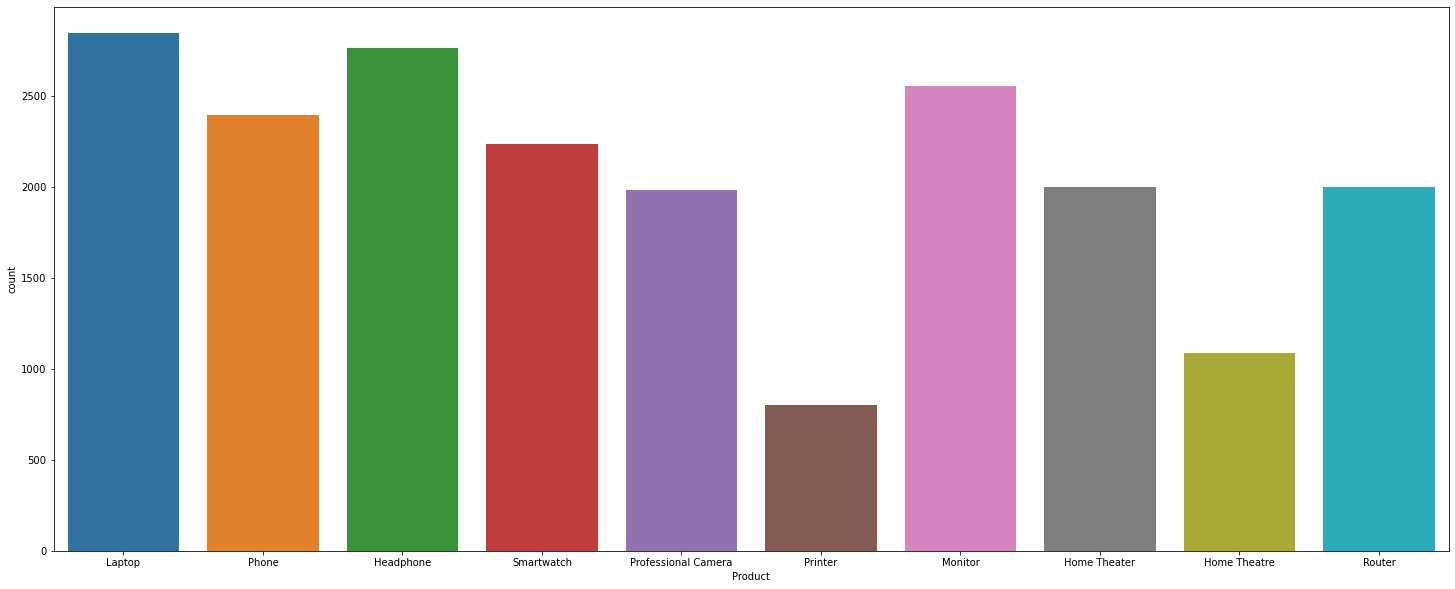

In [144]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Product", data=data)
print(data["Product"].value_counts())

In [145]:
#Combining Home Theatre and Home Theater
data["Product"]=data["Product"].replace("Home Theater", "Home Theatre")

Home Theatre           3085
Laptop                 2848
Headphone              2764
Monitor                2557
Phone                  2399
Smartwatch             2239
Router                 1999
Professional Camera    1985
Printer                 800
Name: Product, dtype: int64


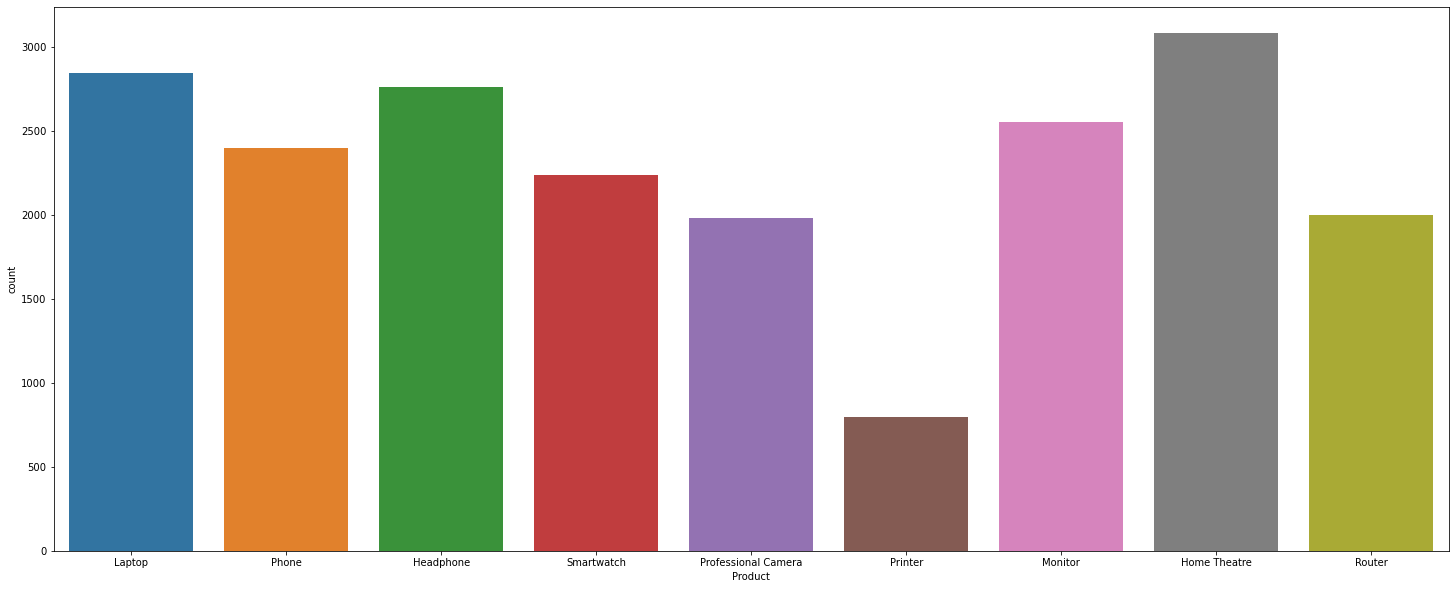

In [146]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Product", data=data)
print(data["Product"].value_counts())

In [147]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Product"])
data["Product"]=df

Samsung        1340
Zebronics      1286
HP             1254
Realme         1230
Sony           1217
Nikon           900
Mi              878
boAt            840
Aroma           800
Obage           800
Canon           759
Acer            610
Apple           600
Boult Audio     500
One Plus        500
JBL             434
Dell            405
Ambrane         400
TP Link         400
TP-Link         400
Intex           400
Tenda           399
Procus          300
D Link          300
Benq            300
LG              300
Nokia           300
Redmi           300
Amazfit         300
Fire-Boltt      300
Oppo            300
Xiaomi          300
Noise           299
Asus            277
Lenovo          232
Huami           200
Cannon          107
Epson           100
Avita            56
MSI              53
Name: Brand, dtype: int64


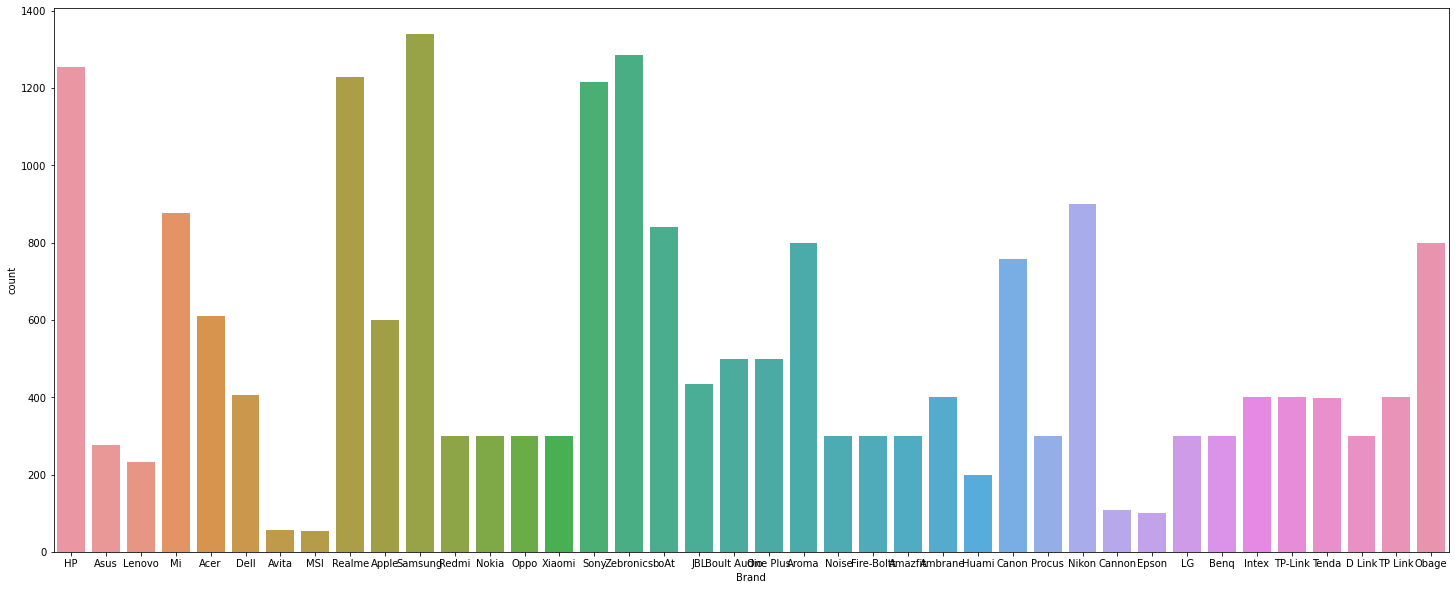

In [148]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Brand", data=data)
print(data["Brand"].value_counts())

In [149]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Brand"])
data["Brand"]=df

Wonderful                              662
Good                                   590
Excellent                              425
Awesome                                372
Brilliant                              363
                                      ... 
Identify yourself.                       1
Good sound but no bass                   1
Pretty Good For The Price You Pay!!      1
Please buy this                          1
Very bad quality                         1
Name: Review, Length: 7957, dtype: int64


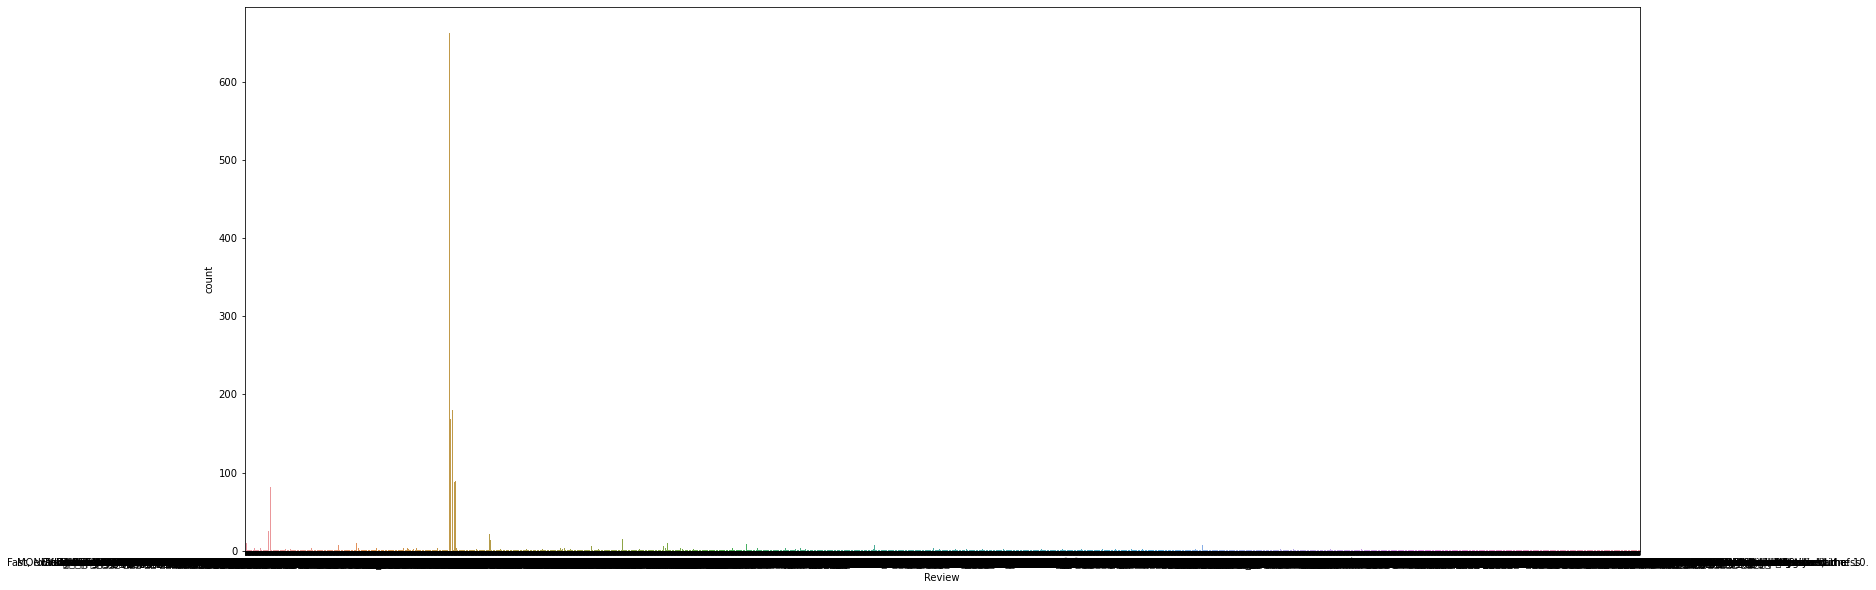

In [150]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Review", data=data)
print(data["Review"].value_counts())

In [151]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Review"])
data["Review"]=df

In [152]:
#Converting rate to int data type
data["Rate"]=data["Rate"].astype(int)

5    10270
4     6058
1     1963
3     1891
2      494
Name: Rate, dtype: int64


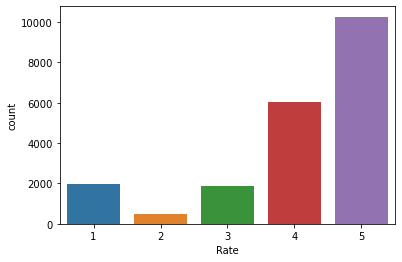

In [153]:
ax=sns.countplot(x="Rate", data=data)
print(data["Rate"].value_counts())

In [154]:
#Statistical Analysis
data.describe()

,Product,Brand,Review,Rate
count,20676.000000,20676.000000,20676.000000,20676.000000
mean,3.572403,21.969143,4153.416860,4.072645
std,2.645638,11.897816,2231.774986,1.238146
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,12.000000,2214.000000,4.000000
50%,3.000000,23.000000,4294.500000,4.000000
75%,6.000000,32.000000,6285.000000,5.000000
max,8.000000,39.000000,7956.000000,5.000000


# Checking Correlation

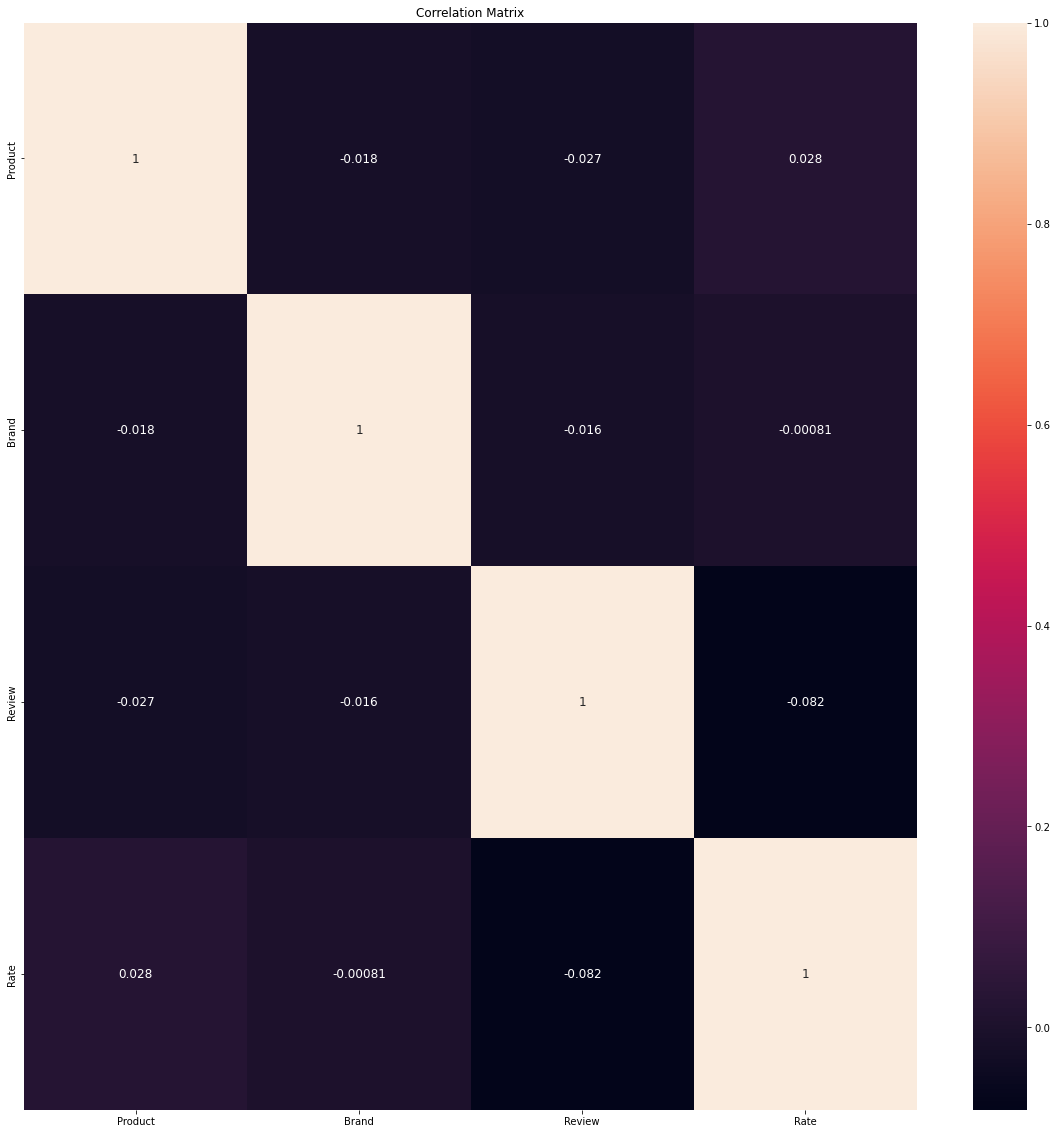

In [155]:
#Lets view the heatmap
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

In [156]:
#Let's print the correlation coefficient for the Prediction of Rate

corr_matrix=data.corr()
corr_matrix["Rate"].sort_values(ascending=False)

Rate       1.000000
Product    0.027645
Brand     -0.000810
Review    -0.081948
Name: Rate, dtype: float64

# Checking for outliers

In [157]:
data.shape

(20676, 4)

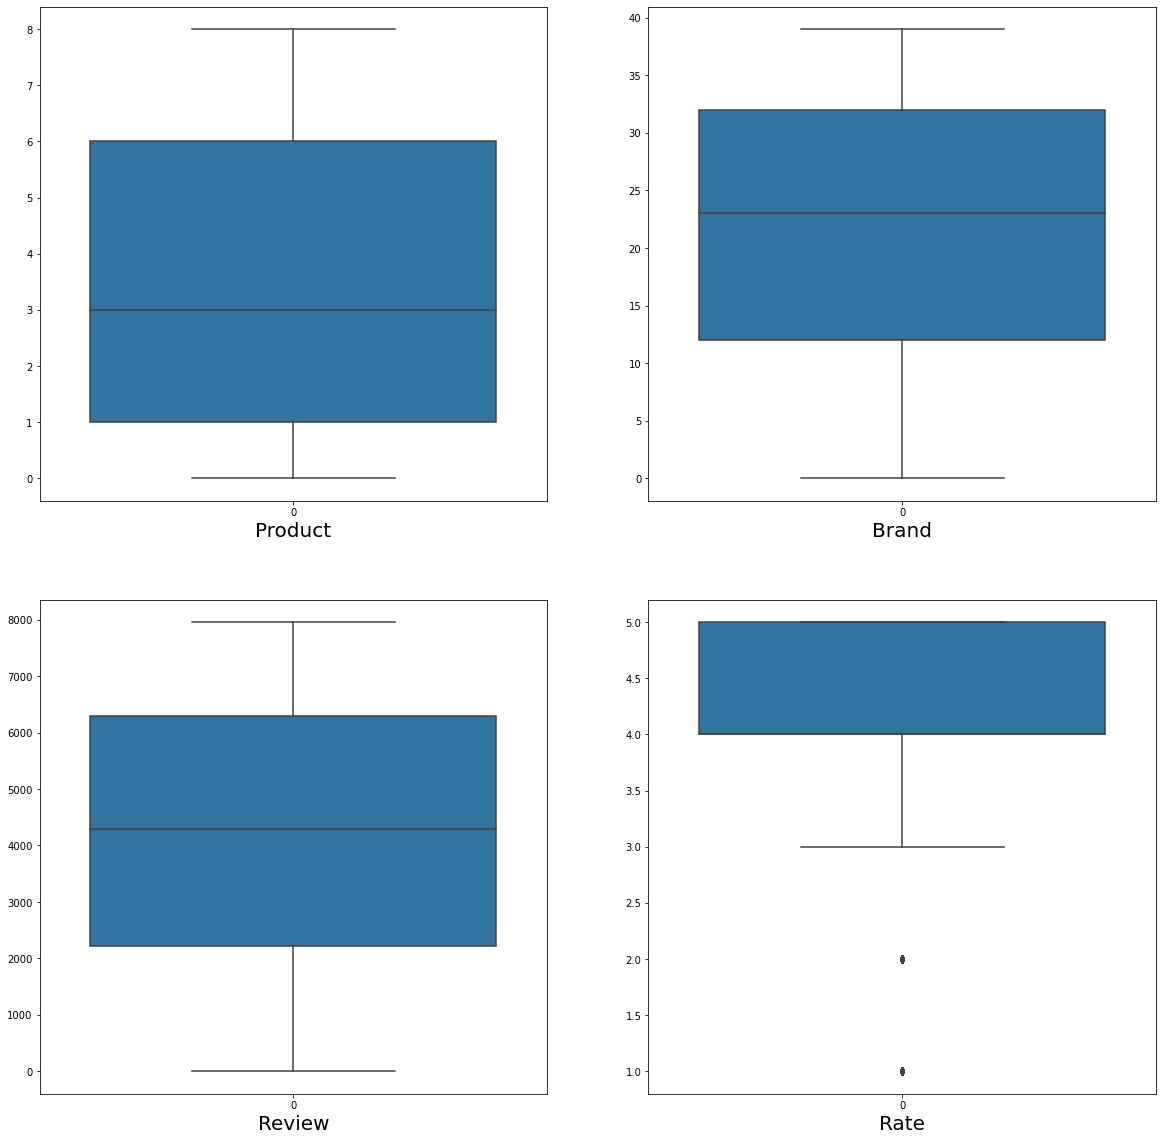

In [158]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,20))
graph=1

for column in data:
    if graph<=4:
        ax=plt.subplot(2,2,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

In [159]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(20676, 4)

In [160]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [161]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(20676, 4)
(20676, 4)


# 
As the data loss is 0%, outlier are removed

# Divide Data Set into features and labels

In [162]:
y=data_new['Rate']
x=data_new.drop(columns=['Rate'])

# Visualizing Relationship

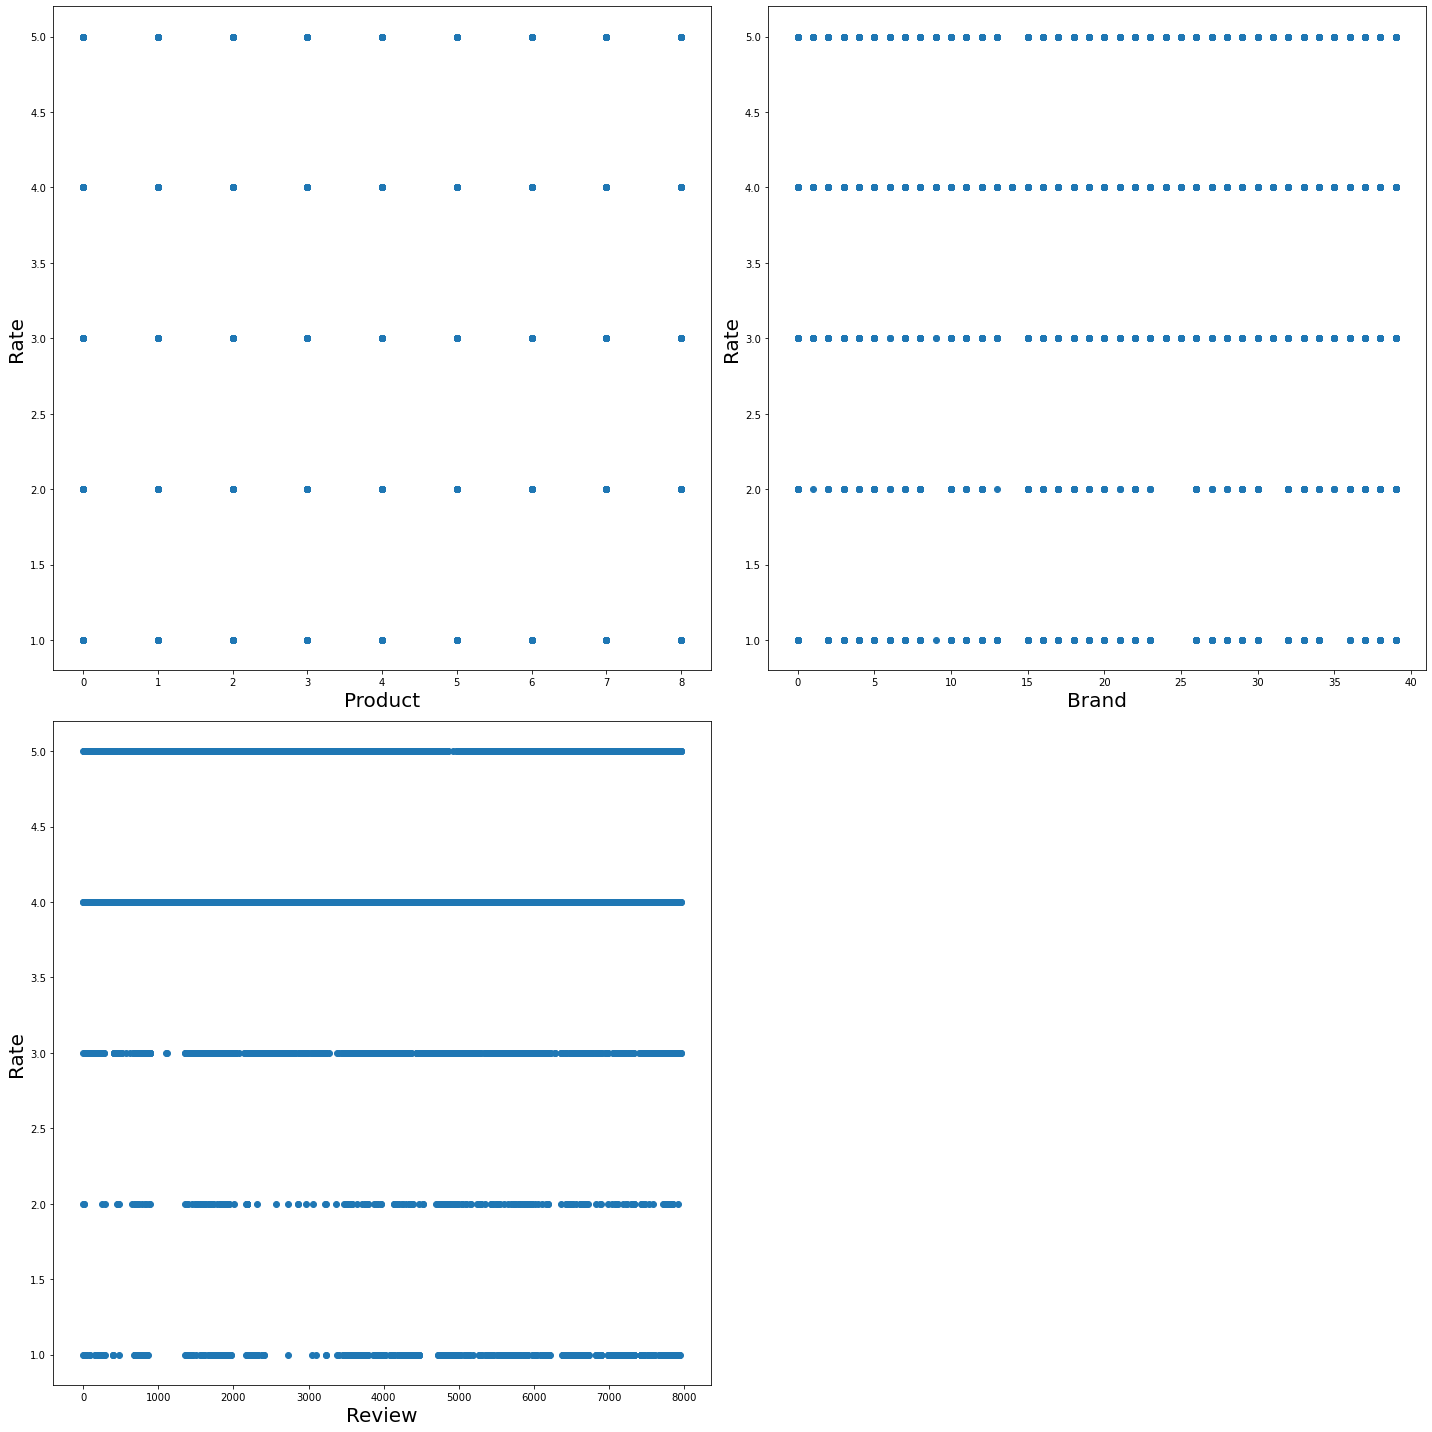

In [163]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Rate', fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

# Checking for skewness

In [164]:
x.skew().sort_values(ascending=False)

Product    0.302151
Review    -0.047409
Brand     -0.313749
dtype: float64

# Transforming Data to remove skewness

In [165]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [166]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

Product   -0.122376
Review    -0.258296
Brand     -0.379717
dtype: float64

# Scaling the data

In [167]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Splitting data into train and test data

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.4920212765957447 random_state 0
accuracy 0.4920212765957447 random_state 0
accuracy 0.4932301740812379 random_state 1
accuracy 0.4932301740812379 random_state 1
accuracy 0.488394584139265 random_state 2
accuracy 0.5070116054158608 random_state 3
accuracy 0.5070116054158608 random_state 3
accuracy 0.500725338491296 random_state 4
accuracy 0.4879110251450677 random_state 5
accuracy 0.4915377176015474 random_state 6
accuracy 0.4920212765957447 random_state 7
accuracy 0.4937137330754352 random_state 8
accuracy 0.48936170212765956 random_state 9
accuracy 0.49347195357833656 random_state 10
accuracy 0.4864603481624758 random_state 11
accuracy 0.4828336557059961 random_state 12
accuracy 0.4961315280464217 random_state 13
accuracy 0.4946808510638298 random_state 14
accuracy 0.48694390715667313 random_state 15
accuracy 0.5012088974854932 random_state 16
accuracy 0.49709864603481624 random_state 17
accuracy 0.49250483558994196 random_state 18
accuracy 0.48694390715667313 random_state 

In [169]:
#creating train-test-split using best random state observed(i.e.3)
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=3)

# Using Logistic Regression Model

In [170]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  50.70116054158608
[[   0    0    0   28  352]
 [   0    0    0    6   88]
 [   0    0    0   17  363]
 [   0    0    0  134 1041]
 [   0    0    0  144 1963]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       380
           2       0.00      0.00      0.00        94
           3       0.00      0.00      0.00       380
           4       0.41      0.11      0.18      1175
           5       0.52      0.93      0.66      2107

    accuracy                           0.51      4136
   macro avg       0.18      0.21      0.17      4136
weighted avg       0.38      0.51      0.39      4136



# Using KNeighbors Classifier Model

In [171]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
predkn=kn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predkn)*100)      #accuracy score
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy  70.67214700193423
[[ 267    0   21   39   53]
 [  14   19    8   17   36]
 [  26    5  152  123   74]
 [  30    2   85  794  264]
 [  51   10   58  297 1691]]
              precision    recall  f1-score   support

           1       0.69      0.70      0.70       380
           2       0.53      0.20      0.29        94
           3       0.47      0.40      0.43       380
           4       0.63      0.68      0.65      1175
           5       0.80      0.80      0.80      2107

    accuracy                           0.71      4136
   macro avg       0.62      0.56      0.57      4136
weighted avg       0.70      0.71      0.70      4136



# Using Decision Tree Classifier

In [172]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  73.67021276595744
[[ 306   10   13   21   30]
 [  13   52    9    5   15]
 [  22   10  199  100   49]
 [  16   12   92  785  270]
 [  34    6   60  302 1705]]
              precision    recall  f1-score   support

           1       0.78      0.81      0.79       380
           2       0.58      0.55      0.57        94
           3       0.53      0.52      0.53       380
           4       0.65      0.67      0.66      1175
           5       0.82      0.81      0.82      2107

    accuracy                           0.74      4136
   macro avg       0.67      0.67      0.67      4136
weighted avg       0.74      0.74      0.74      4136



# Using Random Forest Classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  73.21083172147002
[[ 293    5   16   26   40]
 [  11   50    7   11   15]
 [  17    9  195  101   58]
 [  19   16   85  769  286]
 [  29    4   60  293 1721]]
              precision    recall  f1-score   support

           1       0.79      0.77      0.78       380
           2       0.60      0.53      0.56        94
           3       0.54      0.51      0.52       380
           4       0.64      0.65      0.65      1175
           5       0.81      0.82      0.81      2107

    accuracy                           0.73      4136
   macro avg       0.68      0.66      0.67      4136
weighted avg       0.73      0.73      0.73      4136



# Using AdaBoost Classifier

In [174]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
predada=ada.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predada)*100)      #accuracy score
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy  57.51934235976789
[[  72    0    6   73  229]
 [   2    0    0    9   83]
 [   7    0   14   91  268]
 [  18    0    4  379  774]
 [  17    0    1  175 1914]]
              precision    recall  f1-score   support

           1       0.62      0.19      0.29       380
           2       0.00      0.00      0.00        94
           3       0.56      0.04      0.07       380
           4       0.52      0.32      0.40      1175
           5       0.59      0.91      0.71      2107

    accuracy                           0.58      4136
   macro avg       0.46      0.29      0.29      4136
weighted avg       0.55      0.58      0.51      4136



# Using Gradient Boosting Classifier

In [175]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
gbdt_pred=gbdt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, gbdt_pred)*100)      #accuracy score
print(confusion_matrix(y_test,gbdt_pred))
print(classification_report(y_test,gbdt_pred))

Accuracy  74.75822050290135
[[ 268    4    0   13   95]
 [   5   49    2   16   22]
 [   9    3  129  136  103]
 [   6    2   13  801  353]
 [  10    0   14  238 1845]]
              precision    recall  f1-score   support

           1       0.90      0.71      0.79       380
           2       0.84      0.52      0.64        94
           3       0.82      0.34      0.48       380
           4       0.67      0.68      0.67      1175
           5       0.76      0.88      0.82      2107

    accuracy                           0.75      4136
   macro avg       0.80      0.62      0.68      4136
weighted avg       0.75      0.75      0.74      4136



# Using SVC

In [176]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  54.61798839458414
[[   0    0    0   19  361]
 [   0    0    0    5   89]
 [   0    0    0   60  320]
 [   0    0    0  259  916]
 [   0    0    0  107 2000]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       380
           2       0.00      0.00      0.00        94
           3       0.00      0.00      0.00       380
           4       0.58      0.22      0.32      1175
           5       0.54      0.95      0.69      2107

    accuracy                           0.55      4136
   macro avg       0.22      0.23      0.20      4136
weighted avg       0.44      0.55      0.44      4136



# Cross Validation

In [177]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.48636050229325073


In [178]:
scr2=cross_val_score(kn,x,y,cv=5)
print("Cross validation score of KNeighbor Classifier: ", scr2.mean())

Cross validation score of KNeighbor Classifier:  0.6687013020425251


In [179]:
scr3=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr3.mean())

Cross validation score of Decision Tree Classifier:  0.5379672162204514


In [180]:
scr4=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr4.mean())

Cross validation score of Random Forest Classifier:  0.3148126457401201


In [181]:
scr5=cross_val_score(ada,x,y,cv=5)
print("Cross validation score of Ada Boost Classifier: ", scr5.mean())

Cross validation score of Ada Boost Classifier:  0.4732042478348017


In [182]:
scr6=cross_val_score(gbdt,x,y,cv=5)
print("Cross validation score of Gradient Boost Classifier: ", scr6.mean())

Cross validation score of Gradient Boost Classifier:  0.5855564261306625


In [183]:
scr7=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model: ", scr7.mean())

Cross validation score of SVC model:  0.49671116734766435



Gradient Boosting Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [186]:
KNeighborsClassifier()

KNeighborsClassifier()

In [190]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'algorithm':['kd-tree', 'brute']}

grid=GridSearchCV(KNeighborsClassifier(), param_grid=parameters)
grid.fit(x_train, y_train)
grid.best_params_

{'algorithm': 'brute'}

In [191]:
grid.best_estimator_

KNeighborsClassifier(algorithm='brute')

In [192]:
grid_pred=grid.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,grid_pred) 

0.7055125725338491

# 
Final Accuracy is 70.55 which depicts that our model is working well